# Viral songs vs most listened songs 

I woke up this morning reading this article about the controversy of a viral song on TikTok being nomimated for Grammy
https://me.mashable.com/entertainment/22079/grammy-2023-gayle-tiktoks-viral-hit-abcdefu-is-nominated-for-song-of-the-year-twitter-erupts-with-cr

This seems to create opposite reactions among the music fans. I am not a huge music fan myself or at least I am not a person that always catch up with new songs or current popular songs. I ususally listen to some old tracks for months before moving on to another track. 

So I decide this time to see what music people enjoy in 2022 by visulizing 2 data sets. The first dataset contains most popular songs on Tiktok and the second dataset contains most listened songs on Spotify. My intention is not to argue whether "abcdefu" deserved to be nominated for Grammy or not, since I am far from a music expert and am absolute unaware of what criteria should be taken into consideration for a song to be Grammy nominated.

I simply want to discover if a song is viral on Tiktok, does it mean that people also actually listen to it? Can viral songs also be most listened songs? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [45]:
tiktok = pd.read_csv("Tiktok_songs_2022.csv")

In [5]:
tiktok.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [7]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

Visualization 

1. Tiktok datset 

In [ ]:
Histogram of six important numeric variables of Titktok dataset:artist_pop,track_pop,duration_ms,danceability,energy,loudness

<AxesSubplot:xlabel='danceability', ylabel='Count'>

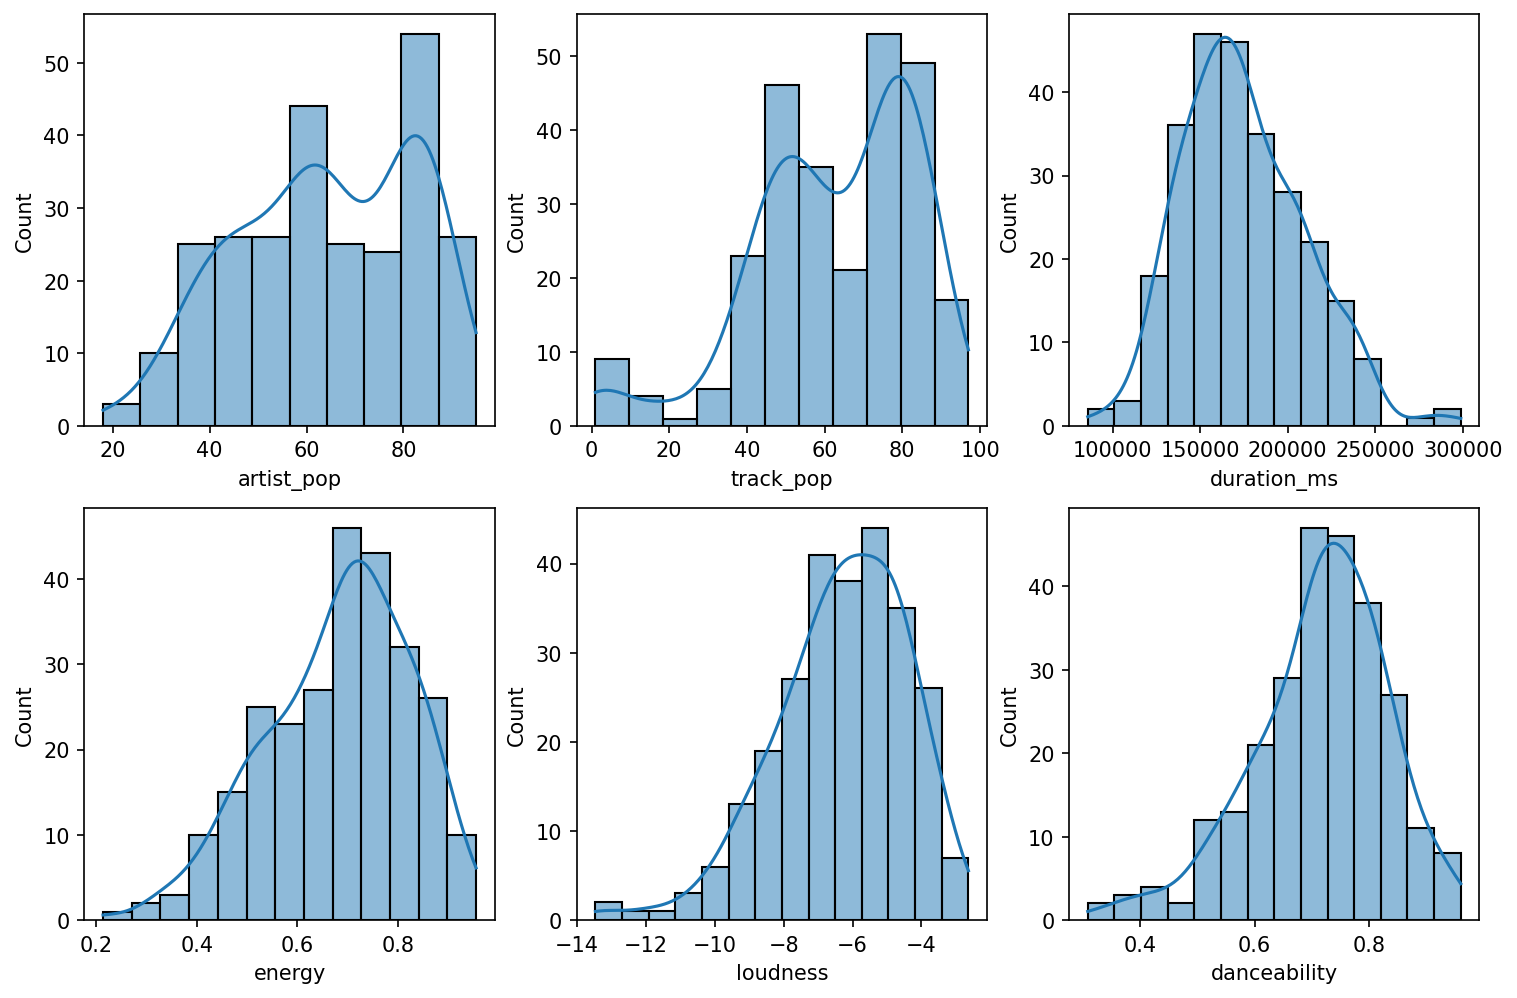

In [302]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(12,8),dpi=150)

sns.histplot(data=tiktok,x="artist_pop", ax=axs[0][0],kde=True)
sns.histplot(data=tiktok,x="track_pop", ax=axs[0][1],kde=True)
sns.histplot(data=tiktok,x="duration_ms",ax=axs[0][2],kde=True)
sns.histplot(data=tiktok,x="energy", ax=axs[1][0],kde=True)
sns.histplot(data=tiktok,x="loudness", ax=axs[1][1],kde=True)
sns.histplot(data=tiktok,x="danceability",ax=axs[1][2],kde=True)

We can notice from this graph that:
Artist popularity has the most uniform distribution
Loundness is the only variable that is negative 
Danceability, energy, loudness distribution is slightly skewed to the left

Do artist with high popularity have tracks with high popularity as well?

<AxesSubplot:xlabel='artist_pop', ylabel='track_pop'>

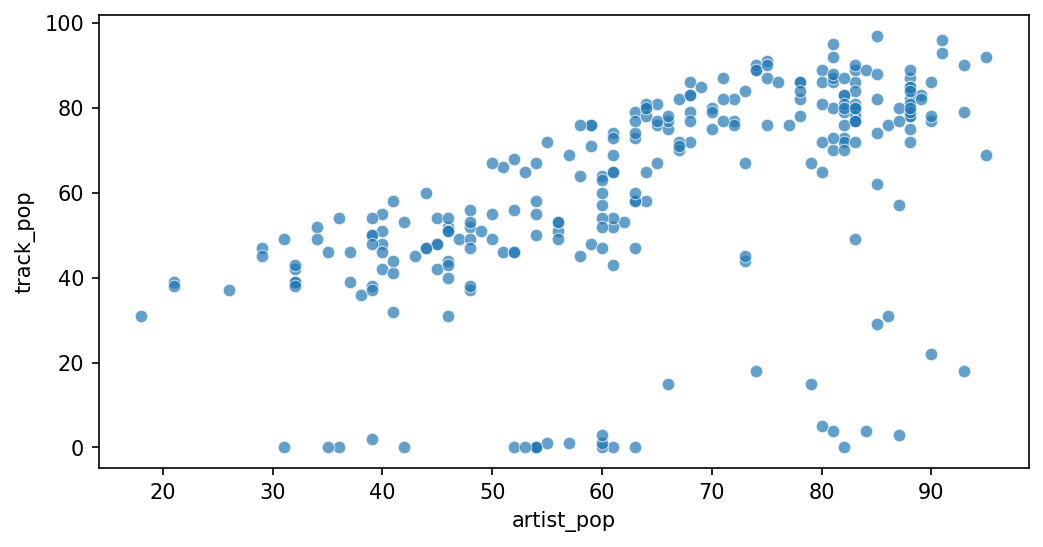

In [26]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=tiktok,x="artist_pop",y="track_pop",alpha=0.7)

The result really suprises me at first! It seems to be the case that popular artist tend to have more popular tracks.
However; we can see a lot of tracks that have 0 popularity eventhough being released by super famous artist. It may due to the fact that Na values for track pop are being replaced with 0. So I will replace those with 0 with the mean of track pop to have a better understanding

In [48]:
tiktok["track_pop"]=tiktok["track_pop"].apply(lambda x: tiktok["track_pop"].mean() if x ==0 else x)

Let's see the scatterplot again

<AxesSubplot:xlabel='artist_pop', ylabel='track_pop'>

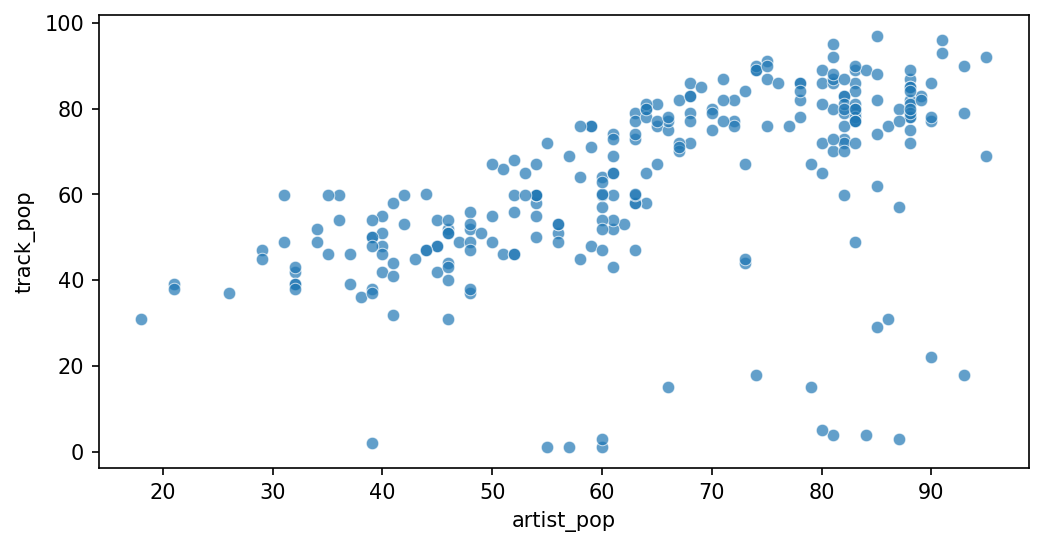

In [49]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=tiktok,x="artist_pop",y="track_pop",alpha=0.7)

The graph books better now. Still, we cannot deny that an artist's popularity can not garantie the success of their released tracks

Let's see the relationship bewteen track_pop and other numerical variable

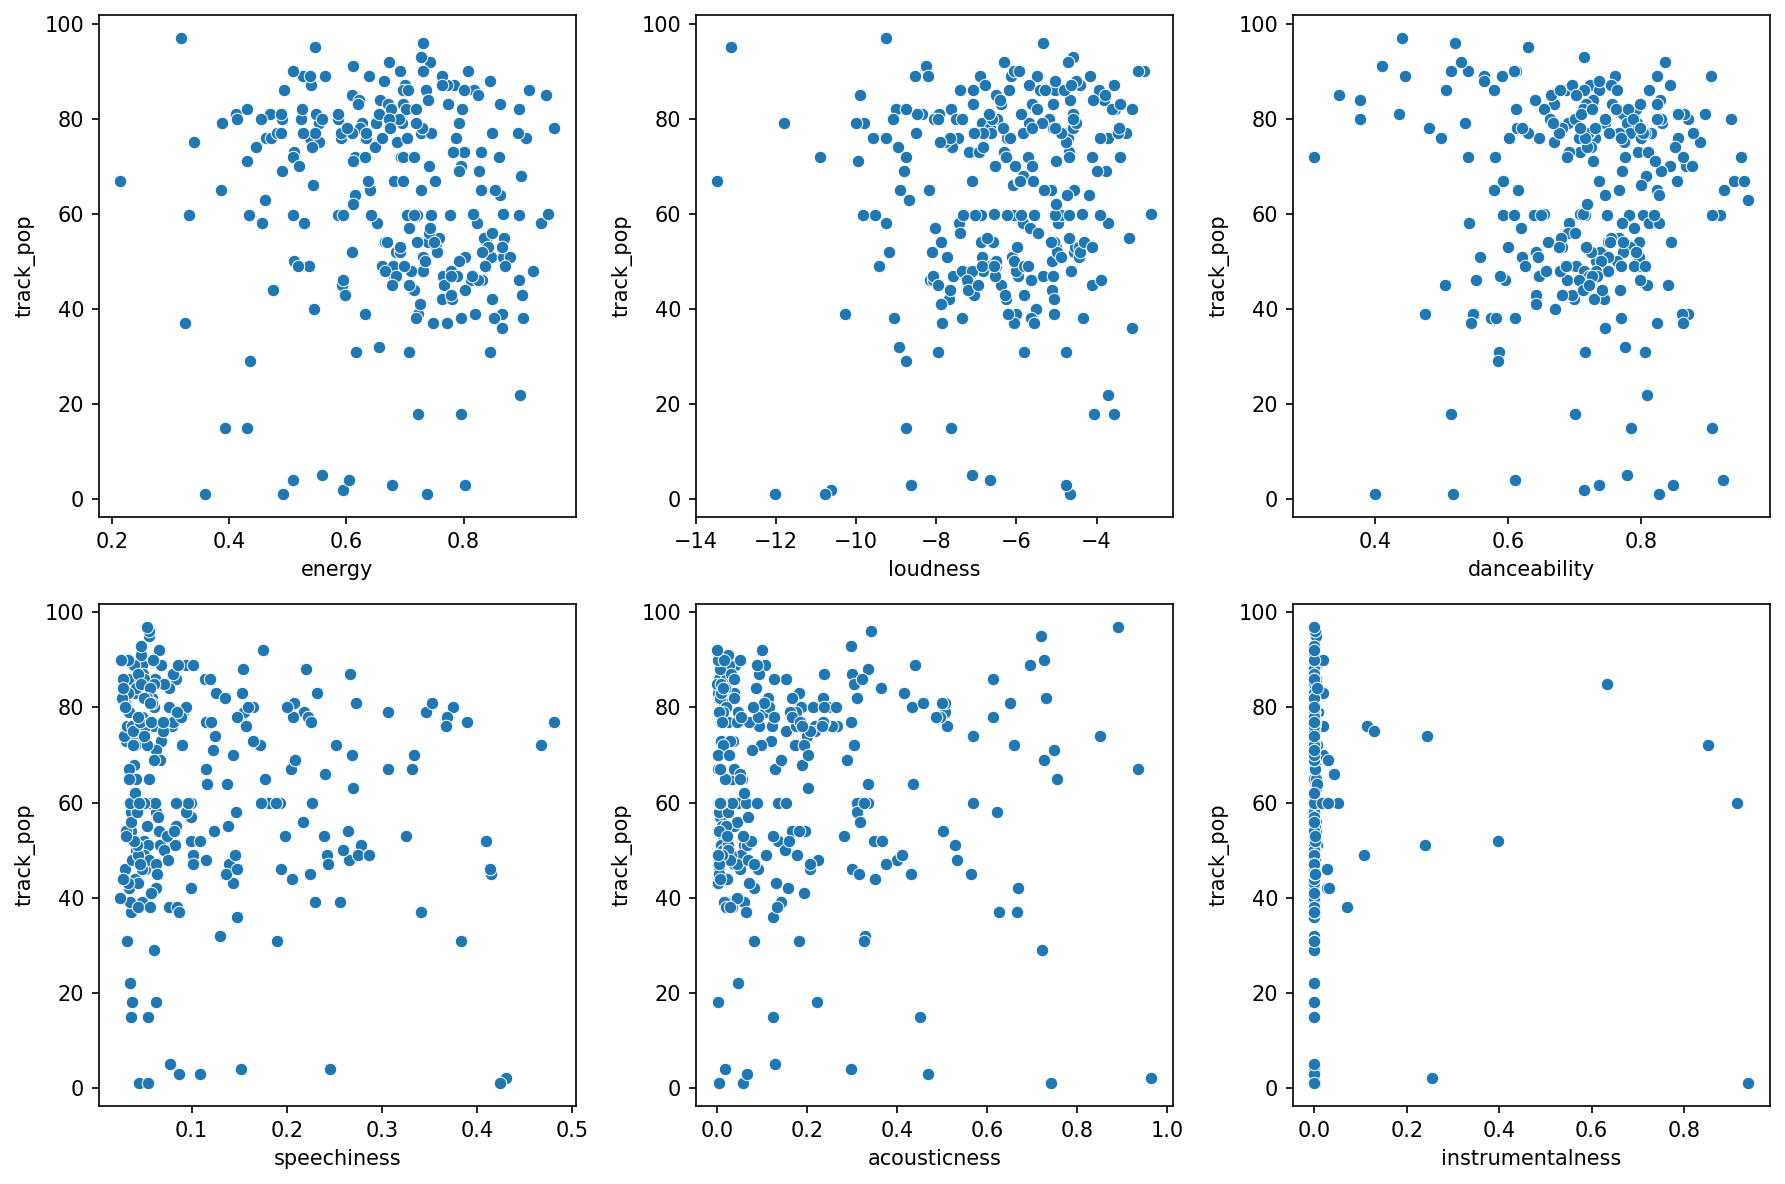

In [306]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(12,8),dpi=150)

sns.scatterplot(data=tiktok,y="track_pop",x="speechiness", ax=axs[1][0])
sns.scatterplot(data=tiktok,y="track_pop",x="acousticness", ax=axs[1][1])
sns.scatterplot(data=tiktok,y="track_pop",x="instrumentalness",ax=axs[1][2])
sns.scatterplot(data=tiktok,y="track_pop",x="energy", ax=axs[0][0])
sns.scatterplot(data=tiktok,y="track_pop",x="loudness", ax=axs[0][1])
sns.scatterplot(data=tiktok,y="track_pop",x="danceability",ax=axs[0][2])

plt.tight_layout()

Clearly beside artist_pop, there is no clear linear pattern can be observed for the relationship of track popularity with other numerical variables
The relationship between track_pop and instrumentalness is almost a vertical line

Now we'll explore the correlation between all numeric variables with heatmap 

In [66]:
corr = tiktok.corr()

/var/folders/js/f7ndthtd3n5_yv7cf06_ybfh0000gn/T/ipykernel_815/3428066816.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tiktok.corr()


<AxesSubplot:>

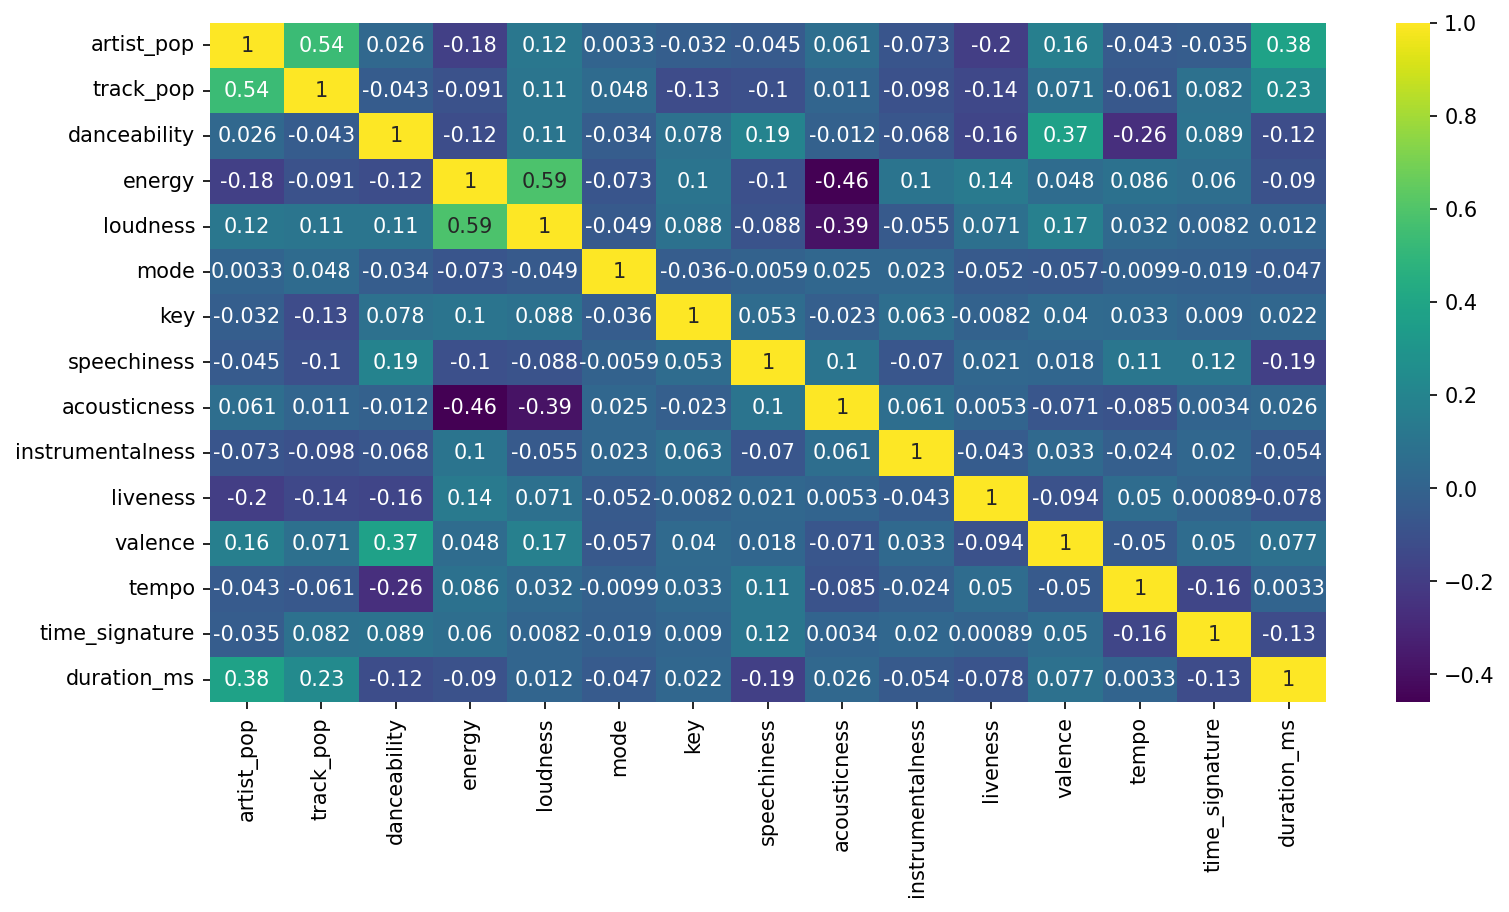

In [106]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(corr,cmap="viridis",annot=True)

We do not see a lot of strong correlation here. 
Energy and loudness have the strong positive correlation while energy and accounticness have the strongest negative correlation

Which artists have the most viral songs on Tiktok in 2022?

In [94]:
artists = tiktok["artist_name"].value_counts().head(10)


<AxesSubplot:>

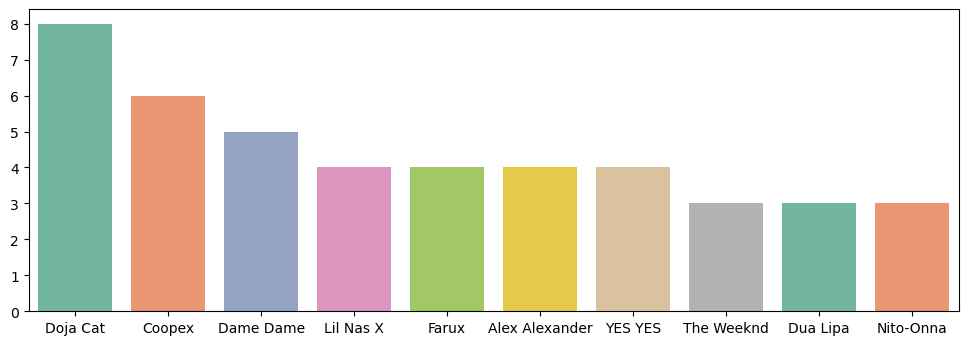

In [95]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=artists.index,y=artists.values,palette="Set2")

Which artists have the most popular songs on Tiktok in 2022? Are they famous artists?

In [153]:
songs = tiktok[["artist_name","track_pop","artist_pop"]].sort_values(by="track_pop",ascending=False).head(10).copy()
names = songs["artist_name"].tolist()

,artist_name,track_pop,artist_pop
5,Joji,97.0,85
1,Harry Styles,96.0,91
0,Kate Bush,95.0,81
52,Harry Styles,93.0,91
260,Drake,92.0,95
4,Lizzo,92.0,81
14,Elley Duhé,91.0,75
137,The Neighbourhood,90.0,83
259,Ruth B.,90.0,75
24,Stephen Sanchez,90.0,74


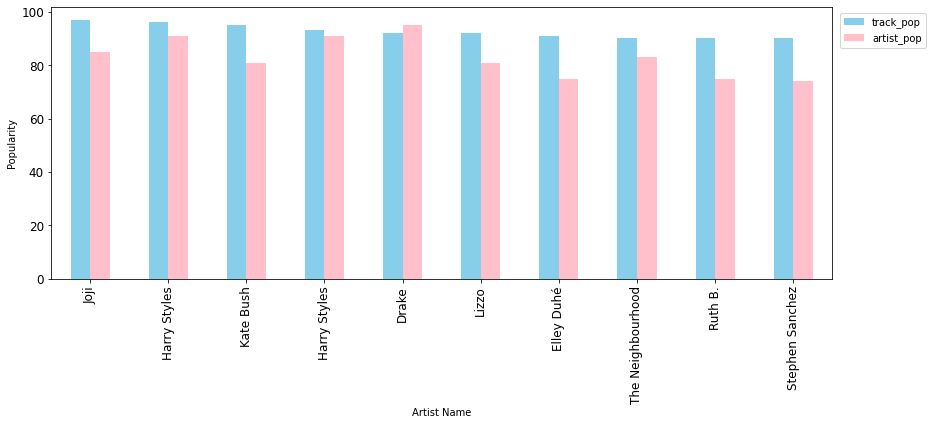

In [296]:
songs.plot(kind="bar",color=["skyblue","pink"],figsize=(14,5),fontsize=12)
plt.xticks(range(0,10), names)
plt.legend(loc=(1.01,0.85))
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()



In [154]:
len(songs[songs["artist_pop"]<80])

3

Top 10 most viral songs on Tiktok all have track_pop values larger than 90. There are 3 artists that have popularity under 80

2. Viral songs vs most listened songs

In [244]:
spotify = pd.read_csv("spotify_top_charts_22.csv")

In [245]:
spotify.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


Let's see if viral songs and most listened songs have the same characteristics?

In [246]:
merge = pd.merge(left=tiktok,right=spotify,how="outer",on="track_name")

In [247]:
merge.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability_x,energy_x,loudness_x,mode_x,key_x,...,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,tempo_y,time_signature_y,duration_ms_y
0,Running Up That Hill (A Deal With God),Kate Bush,81.0,Hounds Of Love,95.0,0.629,0.547,-13.123,0.0,10.0,...,10.0,-13.123,0.0,0.0550,0.720,0.003140,0.0604,108.375,4.0,298933.0
1,As It Was,Harry Styles,91.0,As It Was,96.0,0.520,0.731,-5.338,0.0,6.0,...,6.0,-5.338,0.0,0.0557,0.342,0.001010,0.3110,173.930,4.0,167303.0
2,As It Was,Michael Shynes,52.0,As It Was,46.0,0.595,0.812,-5.623,1.0,9.0,...,6.0,-5.338,0.0,0.0557,0.342,0.001010,0.3110,173.930,4.0,167303.0
3,Sunroof,Nicky Youre,73.0,Sunroof,44.0,0.768,0.716,-5.110,1.0,10.0,...,10.0,-5.110,1.0,0.0401,0.352,0.000000,0.1500,131.443,4.0,163026.0
4,Heat Waves,Glass Animals,80.0,Dreamland (+ Bonus Levels),89.0,0.761,0.525,-6.900,1.0,11.0,...,11.0,-6.900,1.0,0.0944,0.440,0.000007,0.0921,80.870,4.0,238805.0


In [248]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 825
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          826 non-null    object 
 1   artist_name         263 non-null    object 
 2   artist_pop          263 non-null    float64
 3   album               263 non-null    object 
 4   track_pop           263 non-null    float64
 5   danceability_x      263 non-null    float64
 6   energy_x            263 non-null    float64
 7   loudness_x          263 non-null    float64
 8   mode_x              263 non-null    float64
 9   key_x               263 non-null    float64
 10  speechiness_x       263 non-null    float64
 11  acousticness_x      263 non-null    float64
 12  instrumentalness_x  263 non-null    float64
 13  liveness_x          263 non-null    float64
 14  valence             263 non-null    float64
 15  tempo_x             263 non-null    float64
 16  time_sig

/var/folders/js/f7ndthtd3n5_yv7cf06_ybfh0000gn/T/ipykernel_815/1570409263.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(range(0,2),labels=["Tiktok","Spotify"],bbox_to_anchor=(1.1,0.57))


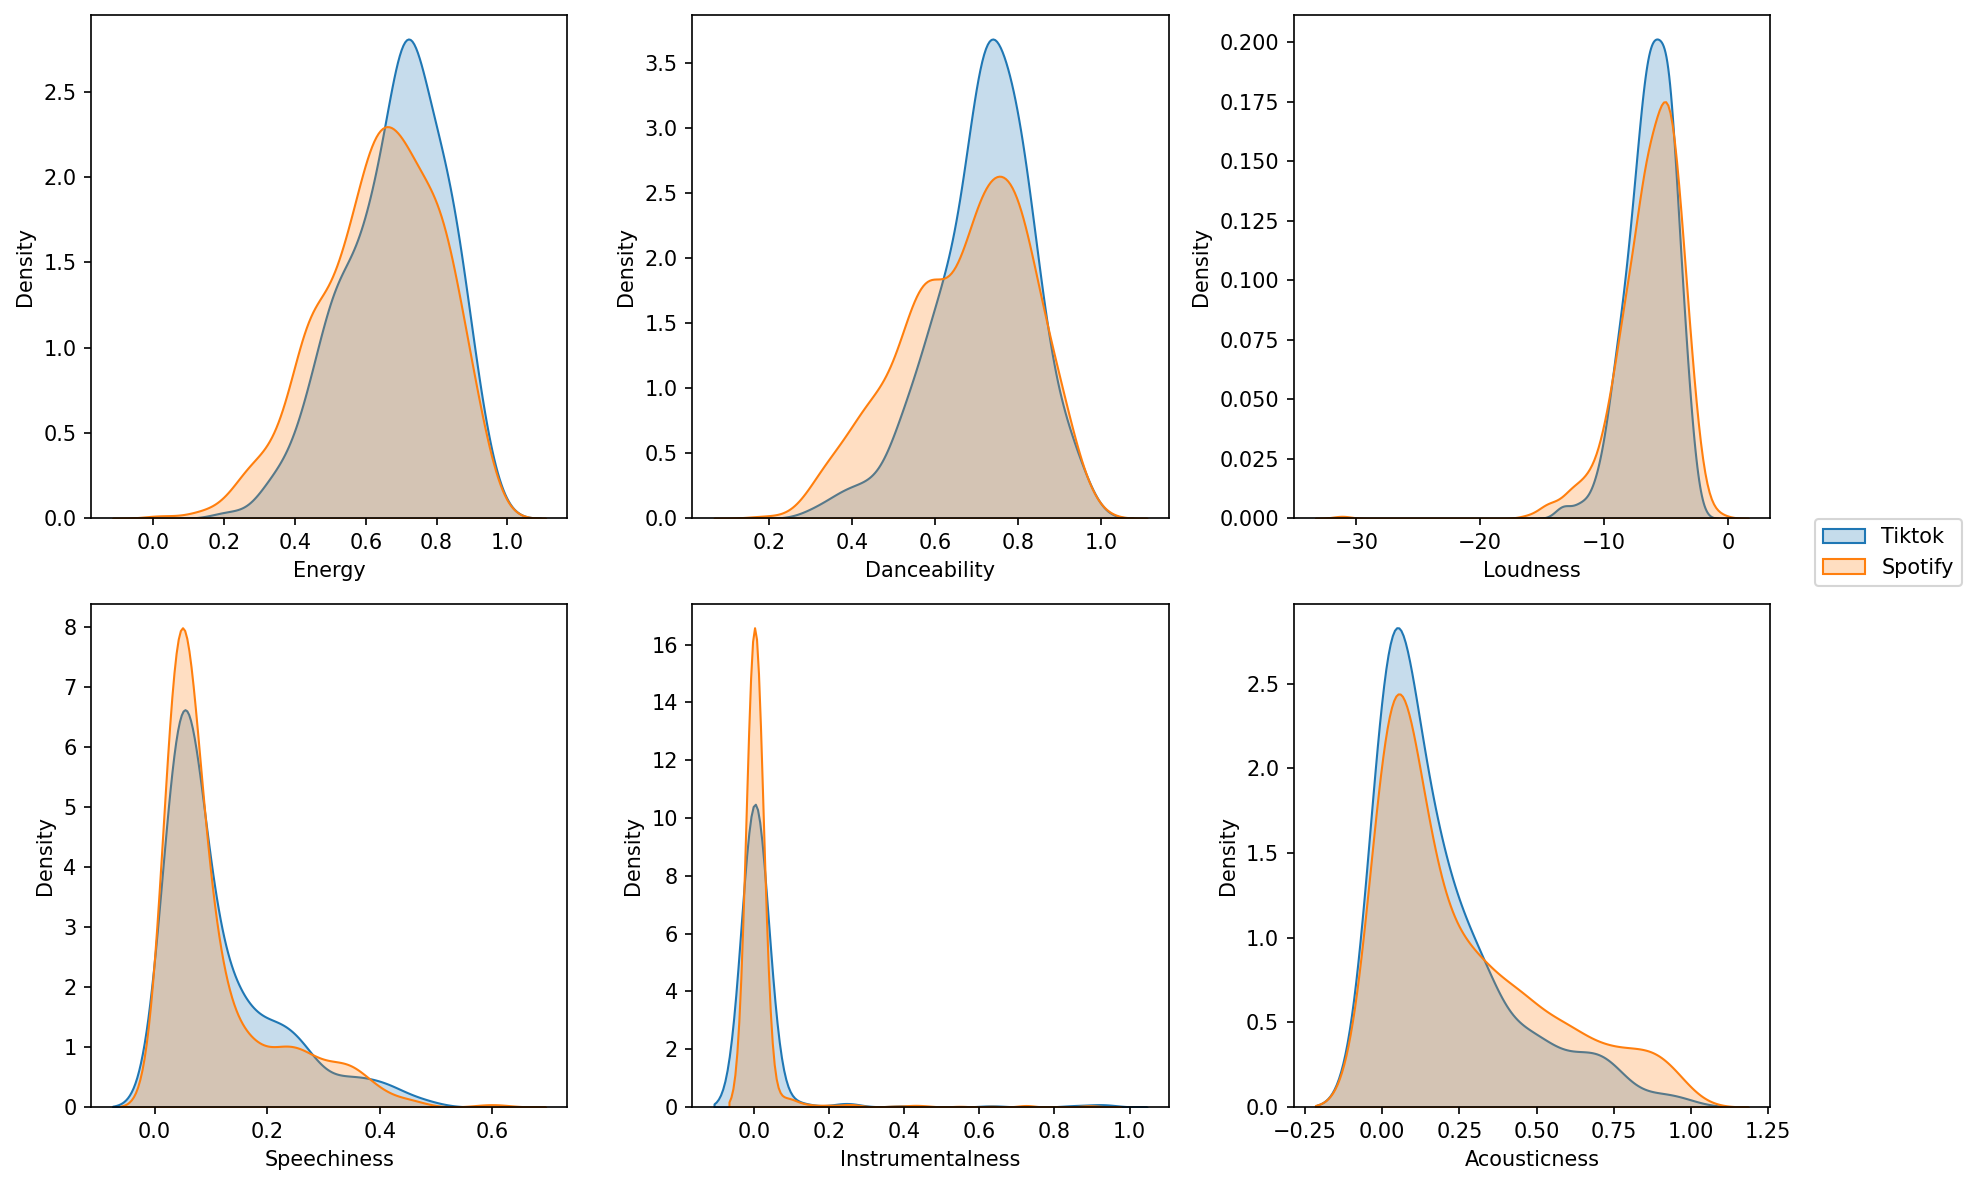

In [307]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(12,8),dpi=150)

sns.kdeplot(data=merge,x="energy_x", ax=axs[0][0],shade=True)
sns.kdeplot(data=merge,x="energy_y", ax=axs[0][0],shade=True)
axs[0][0].set_xlabel("Energy")

sns.kdeplot(data=merge,x="danceability_x",ax=axs[0][1],shade=True)
sns.kdeplot(data=merge,x="danceability_y",ax=axs[0][1],shade=True)
axs[0][1].set_xlabel("Danceability")

sns.kdeplot(data=merge,x="loudness_x", ax=axs[0][2],shade=True)
sns.kdeplot(data=merge,x="loudness_y", ax=axs[0][2],shade=True)
axs[0][2].set_xlabel("Loudness")

sns.kdeplot(data=merge,x="speechiness_x", ax=axs[1][0],shade=True)
sns.kdeplot(data=merge,x="speechiness_y", ax=axs[1][0],shade=True)
axs[1][0].set_xlabel("Speechiness")

sns.kdeplot(data=merge,x="instrumentalness_x", ax=axs[1][1],shade=True)
sns.kdeplot(data=merge,x="instrumentalness_y", ax=axs[1][1],shade=True)
axs[1][1].set_xlabel("Instrumentalness")

sns.kdeplot(data=merge,x="acousticness_x", ax=axs[1][2],shade=True)
sns.kdeplot(data=merge,x="acousticness_y", ax=axs[1][2],shade=True)
axs[1][2].set_xlabel("Acousticness")

fig.legend(range(0,2),labels=["Tiktok","Spotify"],bbox_to_anchor=(1.1,0.57))
plt.tight_layout()


1.Most tiktok songs have high values for energy, danceability. Songs on Spotify chart have a more even distribution regarding these characteristics. 

2.Both most of tiktok and spotify songs have speechiness values larger than 0 and instrumentalness values around 0. Almost most of songs on spotify top chart 2022 have instrumentalness values around 0.

3.Tiktok and spotify have rather similar distribution for accounsticness and loudness value.

Are viral songs also most listened songs?

How many of tiktok viral songs are also in Spotify top chart 2022?

In [271]:
inner_merge = pd.merge(left=tiktok,right=spotify,how="inner",on="track_name")

In [272]:
len(inner_merge)

86

There are 86 viral songs on Tiktok that also appear in Spotify top chart songs 2022

How long that most 25 viral songs stay on chart?

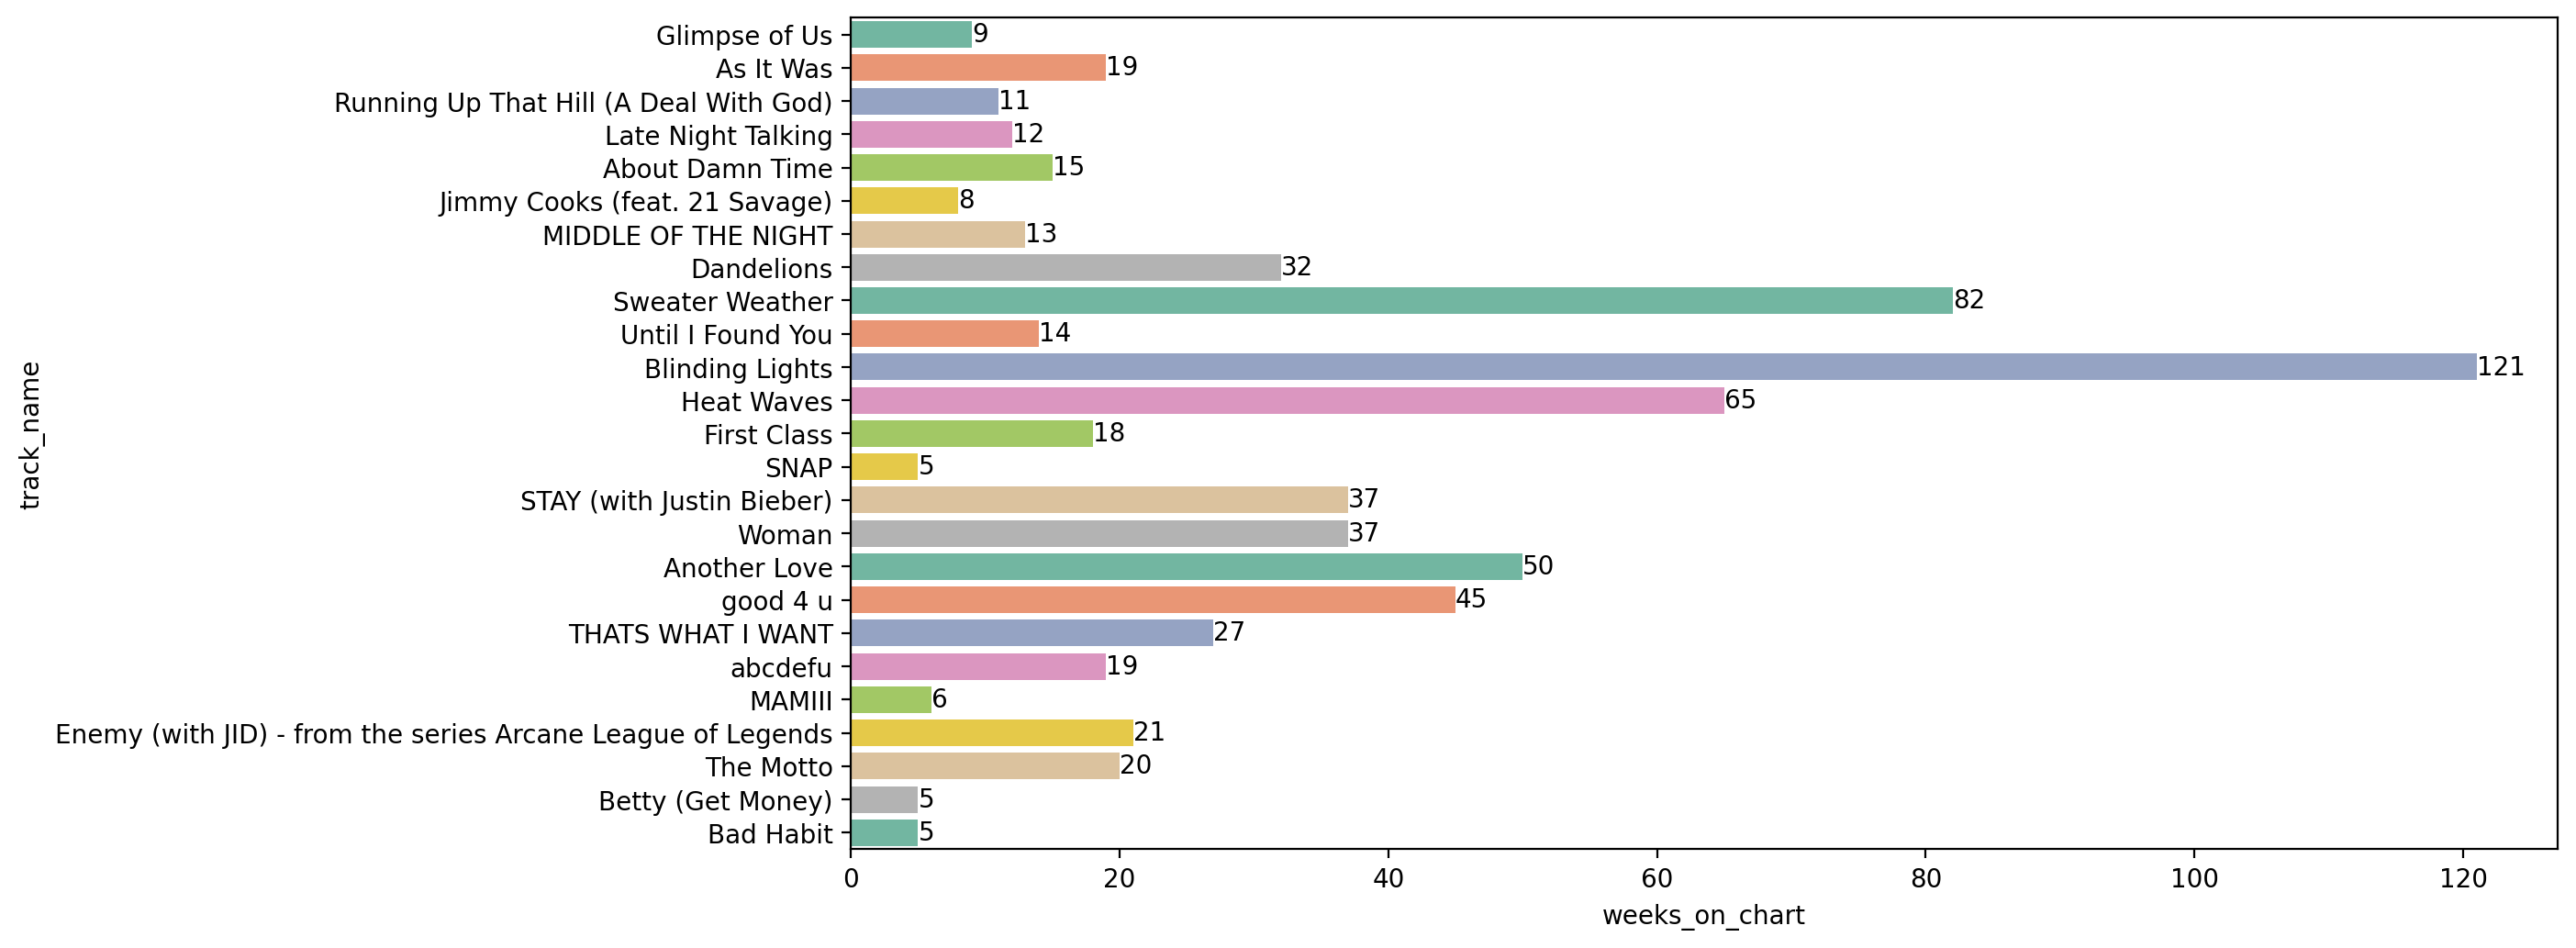

In [298]:
viral_songs = inner_merge.sort_values(by=["track_pop"],ascending=False)[["track_name","artist_name","track_pop","weeks_on_chart"]].head(25).copy()
plt.figure(figsize=(12,6),dpi=200)
ax = sns.barplot(data=viral_songs, y="track_name", x="weeks_on_chart",palette="Set2")
for i in ax.containers:
    ax.bar_label(i,)

Glimpse of us despite being the most viral song on Tiktok, has stayed on Spotify chart for only around 10 weeks. While Biding Light placed 8th among most viral songs has stayed on chart for 121 weeks.
abcdefu also shows up in this chart. It ranks 20th among most viral songs and it has also stayed on Spotify chart up to around 19 weeks.

How popular are 25 viral songs that stayed longer on Spotify chart in 2022?


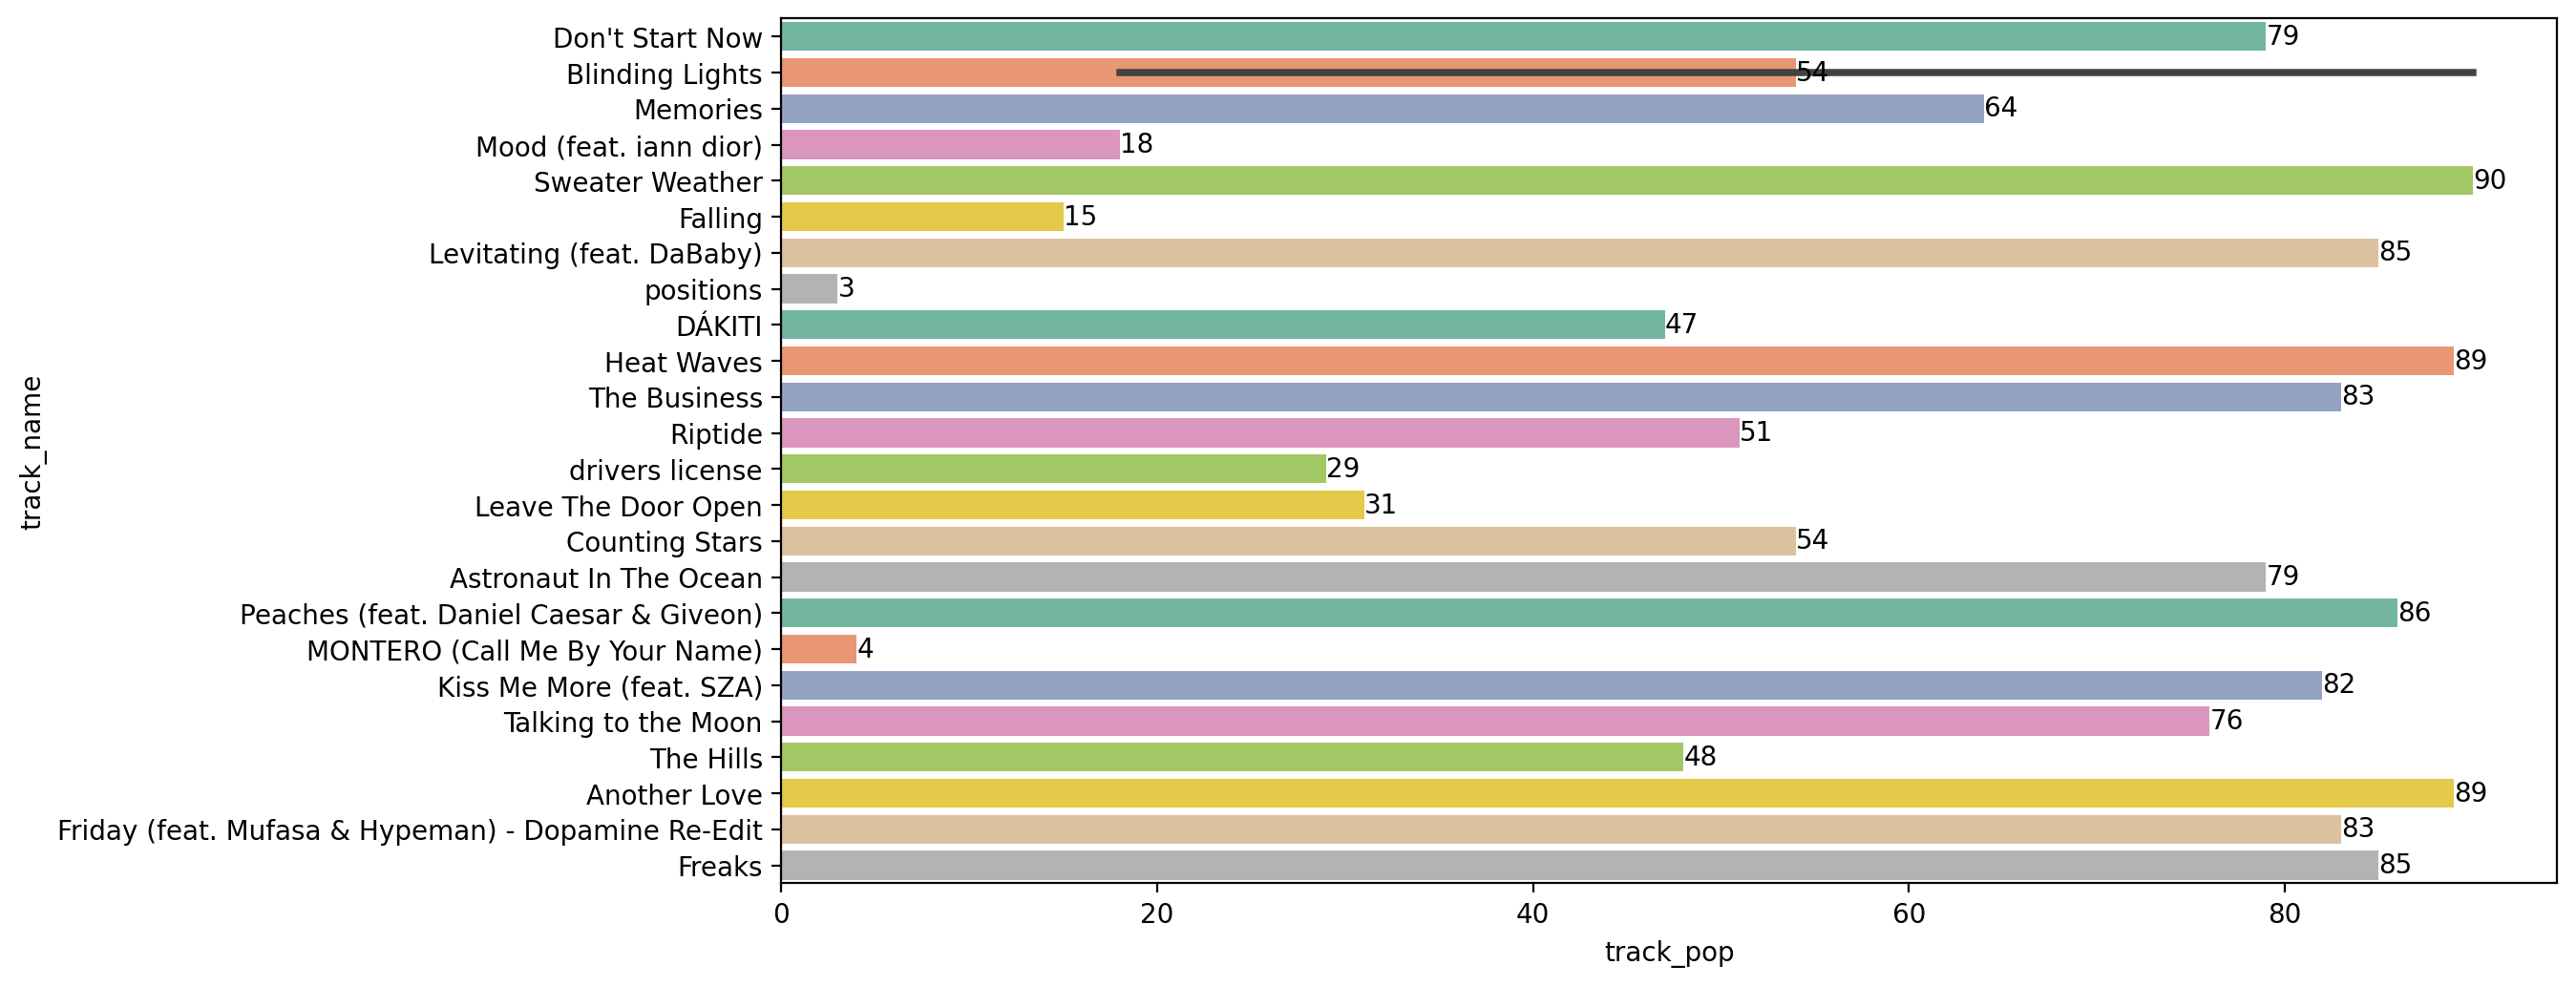

In [299]:
chart_songs = inner_merge.sort_values(by=["weeks_on_chart"],ascending=False)[["track_name","artist_name","track_pop","weeks_on_chart"]].head(25).copy()
plt.figure(figsize=(12,6),dpi=200)
ax= sns.barplot(data=chart_songs, y="track_name", x="track_pop",palette="Set2")
for i in ax.containers:
    ax.bar_label(i,)

Dont start now despite being the song that stayed longer chart, has popularity value under 80.
Sweater Weather, Heatwave and Another are only 3 songs among top 25 songs on Spotify that have track_pop value reach or almost reach 90.
Poristions and Montero placed 8th and 18th among top most listened songs but are not viral at all on Tiktok


What songs are both in top 25 viral songs and top 25 most listened songs?

In [297]:
pd.merge(viral_songs,chart_songs,how="inner",on="track_name")[["track_name","artist_name_x"]]

,track_name,artist_name_x
0,Sweater Weather,The Neighbourhood
1,Blinding Lights,The Weeknd
2,Blinding Lights,The Weeknd
3,Heat Waves,Glass Animals
4,Another Love,Tom Odell


Sweater Weather,Blinding Lights,Heat Waves,Another Love are the only songs that show up in both charts.
Generally we see that top most viral songs are not always top most listened songs on Spootify; however there are a few songs that are both enjoyed by music fan and Tiktok community. 


After all , Abcefu though doesnt belong to this list, which makes it understandable why some music fans are not convinced at all for its nomination in Grammy, due to its lack of impressive performance on Spotify chart.